## Basic statistics of the public transport network of Paris

---

In this notebook, we will compute some basic statistics of the public transport network of Paris. We focus on three types of public transportation:

- **Railway Network:** Metro, RER, Tramway

- **Bus Network:** Bus stops and bus lines

- **Bike Network:** Bike stations and bike lanes

All the data used in this notebook is coming from the [Open Street Map](https://www.openstreetmap.org/) project. However, since in [Open Street Map](https://www.openstreetmap.org/), all the information are provided by users, the data is not always accurate. 

In [21]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
os.environ['USE_PYGEOS'] = '0'
import helpers as hs

In [22]:
tags_transportation = {
    'Bicycle Sharing Docking Station': {"bicycle_rental": "docking_station"},
    'Bus Station': {'public_transport': 'station'},
    'Railway Station': {'railway': ["station", "halt", "tram_stop"]},
}

coords_places = {
    'Gare du Nord, Paris': (48.881399, 2.357438),
    'Porte de la Chapelle, Paris': (48.8977035, 2.3594563),
    'Opéra Garnier, Paris': (48.87202885000001, 2.331785061251358),
    'Sacré Coeur, Paris': (48.88680575, 2.3430153448835087),
    'Place de la Bastille, Paris': (48.8534157, 2.3696321),
    'Arc de triomphe, Paris': (48.8737791, 2.295037226037673),
    'Olympiades, Paris': (48.8270448, 2.3664175),
    'Quartier de Javel, Paris': (48.8392472, 2.279050277443888),
    'Eglise du Saint-Esprit, Paris': (48.8382111, 2.397625542131148),
    'Place des Vosges, Paris': (48.85559575, 2.3655334556312413)
}

In [23]:
# Define geographic location of Paris and tags for railway stations, bus stations, and bike rental stations
city = "Paris, France"
tags_railway = {"railway": ["station", "halt", "tram_stop"], 'station': 'subway'}
tags_bus = {'public_transport': 'station'}
tags_bike = {"bicycle_rental": "docking_station"}

# Retrieve the number of railway stations in Paris
stations_railway = ox.geometries_from_place(city, tags_railway)
num_railway_stations = len(stations_railway)

# Retrieve the number of bus stations in Paris
stations_bus = ox.geometries_from_place(city, tags_bus)
num_bus_stations = len(stations_bus)

# Retrieve the number of bike rental stations in Paris
stations_bike = ox.geometries_from_place(city, tags_bike)
num_bike_stations = len(stations_bike)

print("Number of railway stations in Paris:", num_railway_stations)
print("Number of bus stations in Paris:", num_bus_stations)
print("Number of bike rental stations in Paris:", num_bike_stations)

Number of railway stations in Paris: 485
Number of bus stations in Paris: 248
Number of bike rental stations in Paris: 992


<ipython-input-23-8bf38a395c7f>:8: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-23-8bf38a395c7f>:12: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-23-8bf38a395c7f>:16: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.



Then, we try to see the puiblic transportation resources in the different districts of Paris. We first find out the coordinates of the districts of Paris, and then we use the Open Street Map API to find out the public transportation resources in the region with a radius of 1 km.

In [24]:
stations_count_df = hs.count_transport_stations(coords=coords_places, tags=tags_transportation)
stations_count_df

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/Users/yubocai/Desktop/Ecole Polytechnique/Internship/CREST/BATO_extension/helpers/basicstatistics.py:53: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

/Users/yubocai/Desktop/Ecole Polytechnique/Internship/CREST/BATO_extension/helpers/basicstatistics.py:53: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geome

,Bicycle Sharing Docking Station,Bus Station,Railway Station
"Gare du Nord, Paris",68,16,18
"Porte de la Chapelle, Paris",20,3,13
"Opéra Garnier, Paris",77,24,26
"Sacré Coeur, Paris",54,12,14
"Place de la Bastille, Paris",48,10,14
"Arc de triomphe, Paris",49,17,19
"Olympiades, Paris",37,9,24
"Quartier de Javel, Paris",40,12,28
"Eglise du Saint-Esprit, Paris",31,9,22
"Place des Vosges, Paris",55,8,13


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



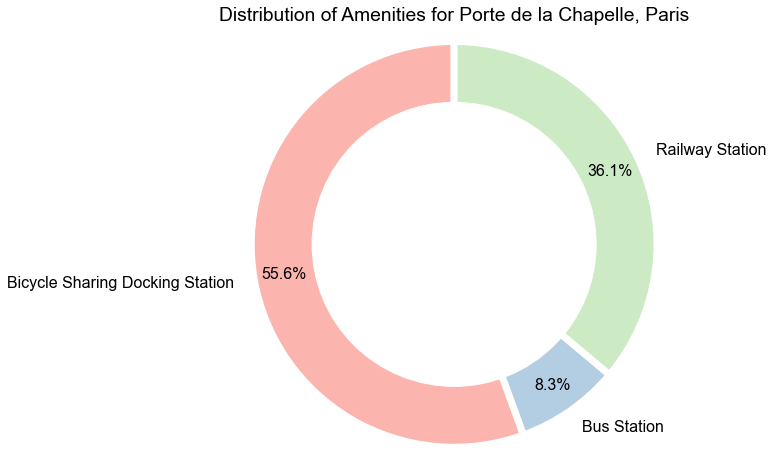

In [25]:
graph_composition_chart = hs.composition_chart_public_transportation(stations_count_df, place='Porte de la Chapelle, Paris', font_size=16, font_name='Arial')
graph_composition_chart.show()

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



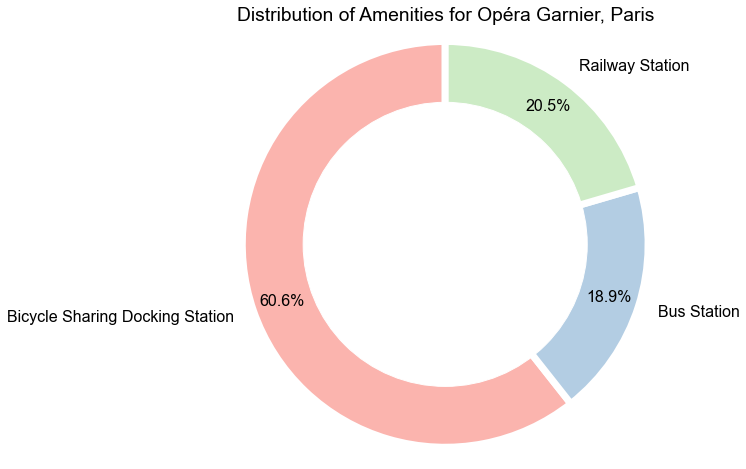

In [27]:
graph_composition_chart = hs.composition_chart_public_transportation(stations_count_df, place='Opéra Garnier, Paris', font_size=16, font_name='Arial')
graph_composition_chart.show()

In [26]:
graph_compare_places = hs.compare_places_public_transportation(stations_count_df)
graph_compare_places.show()